In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2023-05-05 18:28:26.669046: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 18:28:26.929662: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 18:28:26.931865: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 18:28:28.652364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values - 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

X_train, X_forward, y_train, y_forward = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5)


In [3]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


Epoch 1/100
123/123 [==============================] - 3s 6ms/step - loss: 1.9444 - accuracy: 0.1607 - val_loss: 1.9091 - val_accuracy: 0.3318
Epoch 2/100
123/123 [==============================] - 0s 4ms/step - loss: 1.8339 - accuracy: 0.2207 - val_loss: 1.5451 - val_accuracy: 0.2786
Epoch 3/100
123/123 [==============================] - 0s 4ms/step - loss: 1.5930 - accuracy: 0.2788 - val_loss: 1.3810 - val_accuracy: 0.3064
Epoch 4/100
123/123 [==============================] - 1s 4ms/step - loss: 1.4550 - accuracy: 0.3536 - val_loss: 1.2223 - val_accuracy: 0.5739
Epoch 5/100
123/123 [==============================] - 1s 5ms/step - loss: 1.3318 - accuracy: 0.4148 - val_loss: 1.0993 - val_accuracy: 0.5529
Epoch 6/100
123/123 [==============================] - 1s 4ms/step - loss: 1.2673 - accuracy: 0.4454 - val_loss: 1.0078 - val_accuracy: 0.5318
Epoch 7/100
123/123 [==============================] - 1s 4ms/step - loss: 1.1235 - accuracy: 0.4895 - val_loss: 0.9355 - val_accuracy: 0.5764

88/88 [==============================] - 0s 2ms/step
Test accuracy: 0.744


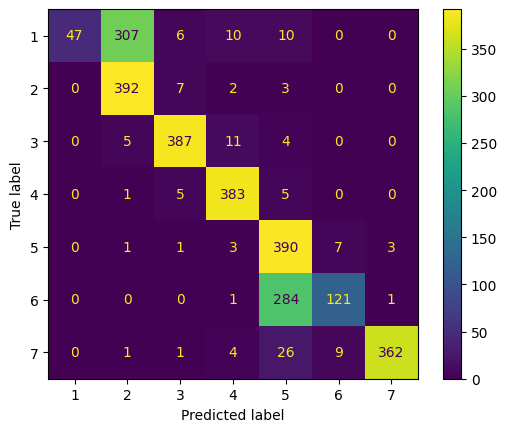

In [4]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()


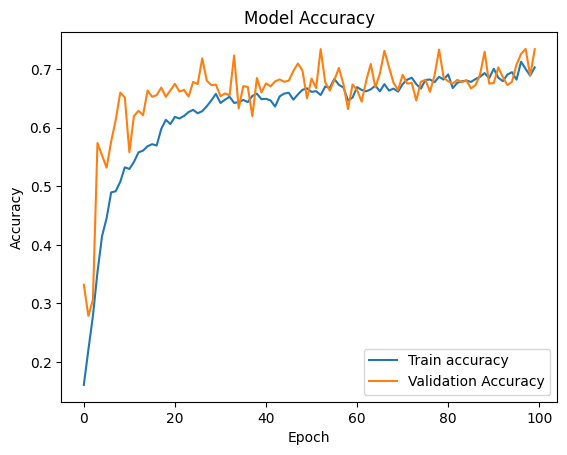

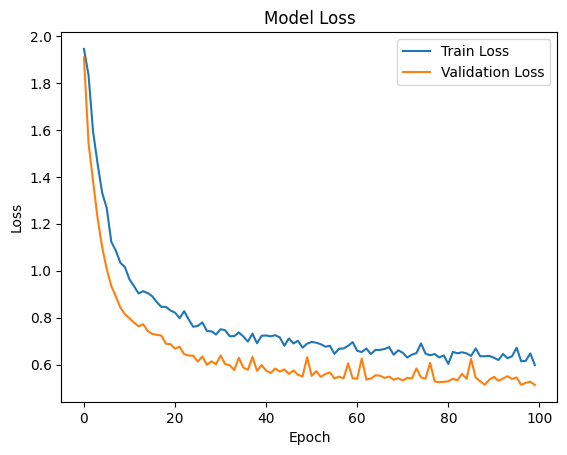

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation Accuracy'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()


In [8]:
model.save("./models/mlp_v1")
model = tf.keras.models.load_model("./models/mlp_v1/")

2023-05-05 16:37:34.407608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-05-05 16:37:34.423678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-05-05 16:37:34.443602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,16]
	 [[{{node inputs}}]]
2023-05-05 16:37:34

INFO:tensorflow:Assets written to: ./models/mlp_v1/assets


INFO:tensorflow:Assets written to: ./models/mlp_v1/assets
